In [180]:
from tpot import TPOTClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [181]:
# load
pref = ['C4_1_','C4_5_','C4_6_', 'C4_8_', 'C4_10_']
df_d = {}
for i in range(len(pref)):
    fname  = pref[i] + 'features.csv'
    df_d[i] = pd.read_csv(fname)
#df = pd.read_csv('C4_10_features.csv')
#df_d[4]  

In [182]:
df = pd.concat(df_d.values(), ignore_index=True)

In [183]:
# inspect
df

,HDF,Complexity,Mobility,classe
0,2.150808,1.438250,0.540240,0
1,1.977571,1.935658,0.397211,0
2,2.027908,1.283070,0.653880,0
3,2.093969,1.291287,0.667136,0
4,2.049368,1.350312,0.632099,0
...,...,...,...,...
30715,1.699075,2.279243,0.262907,1
30716,1.814246,1.893517,0.324222,1
30717,1.731315,2.305491,0.289293,1
30718,1.426440,3.283170,0.162773,1


In [184]:
# inspect types 
df.dtypes

HDF           float64
Complexity    float64
Mobility      float64
classe          int64
dtype: object

In [185]:
df.shape[1]

4

In [186]:
X = df.iloc[:,0:df.shape[1] -1].values
y = df.iloc[: , -1:].values

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, random_state=18, stratify=y)

In [191]:
# TPOT cfg
tpot = TPOTClassifier(verbosity=2, 
                      scoring="accuracy", 
                      random_state=18,  
                      generations=15, 
                      population_size=10,
                      early_stop=10)

In [192]:
%%time
# fit
tpot.fit(X_train, y_train)

/home/askery/anaconda3/envs/pycaret+/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Optimization Progress:   0%|          | 0/160 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6421303659361299

Generation 2 - Current best internal CV score: 0.6422931246983918

Generation 3 - Current best internal CV score: 0.6422931246983918

Generation 4 - Current best internal CV score: 0.6422931246983918

Generation 5 - Current best internal CV score: 0.6422931246983918

Generation 6 - Current best internal CV score: 0.6422931246983918

Generation 7 - Current best internal CV score: 0.6422931246983918

Generation 8 - Current best internal CV score: 0.6435137533347626

Generation 9 - Current best internal CV score: 0.6435137533347626

Generation 10 - Current best internal CV score: 0.6435137533347626

Generation 11 - Current best internal CV score: 0.6453040086681063

Generation 12 - Current best internal CV score: 0.6453040086681063

Generation 13 - Current best internal CV score: 0.6453040086681063

Generation 14 - Current best internal CV score: 0.6453040086681063

Generation 15 - Current best internal CV score: 0.645304

TPOTClassifier(early_stop=10, generations=15, population_size=10,
               random_state=18, scoring='accuracy', verbosity=2)

In [193]:
# TPOT Predict
y_pred = tpot.predict(X_test)

In [194]:
# Results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.56      0.61      3072
           1       0.62      0.71      0.66      3072

    accuracy                           0.64      6144
   macro avg       0.64      0.64      0.63      6144
weighted avg       0.64      0.64      0.63      6144



In [195]:
# sanity check (accuracy)
tpot.score(X_test, y_test)

/home/askery/anaconda3/envs/pycaret+/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6350911458333334

In [196]:
# confusion matrix
cm  = confusion_matrix(y_test, y_pred)
cm

array([[1723, 1349],
       [ 893, 2179]])

In [197]:
from pretty_confusion_matrix import pp_matrix

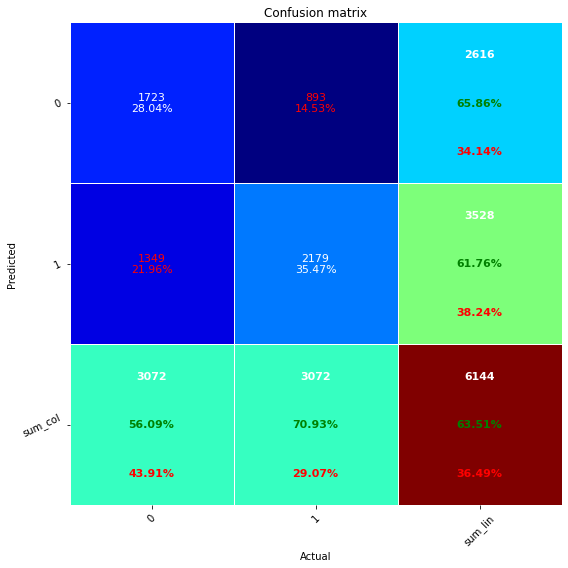

In [198]:
df_cm = pd.DataFrame(cm, range(2), range(2))
cmap  = 'jet'#'spring'#'summer'#'winter'#'RdBu'#'PuRd'#'autumn'#'prism'#
pp_matrix(df_cm, cmap=cmap)

In [153]:
# can we use data from one person to others? vice versa?

In [166]:
# load val
df_val = pd.read_csv('C4_10_features.csv')  
X_val  = df_val.iloc[:,0:df_val.shape[1] -1].values
y_val  = df_val.iloc[: , -1:].values

In [167]:
# sanity check (accuracy)
tpot.score(X_val, y_val)

/home/askery/anaconda3/envs/pycaret+/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.73974609375

In [168]:
y_pred_val = tpot.predict(X_val)

In [169]:
# confusion matrix
cm_val  = confusion_matrix(y_pred_val, y_val)
cm_val

array([[2207,  734],
       [ 865, 2338]])

In [ ]:
df.columns = ['X','y']

In [ ]:
#df = df.replace(" ", "," )
#df

In [ ]:
df.iloc[0]['X']

In [ ]:
df.replace("\n", "" )
#df